In [1]:
# import lib
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

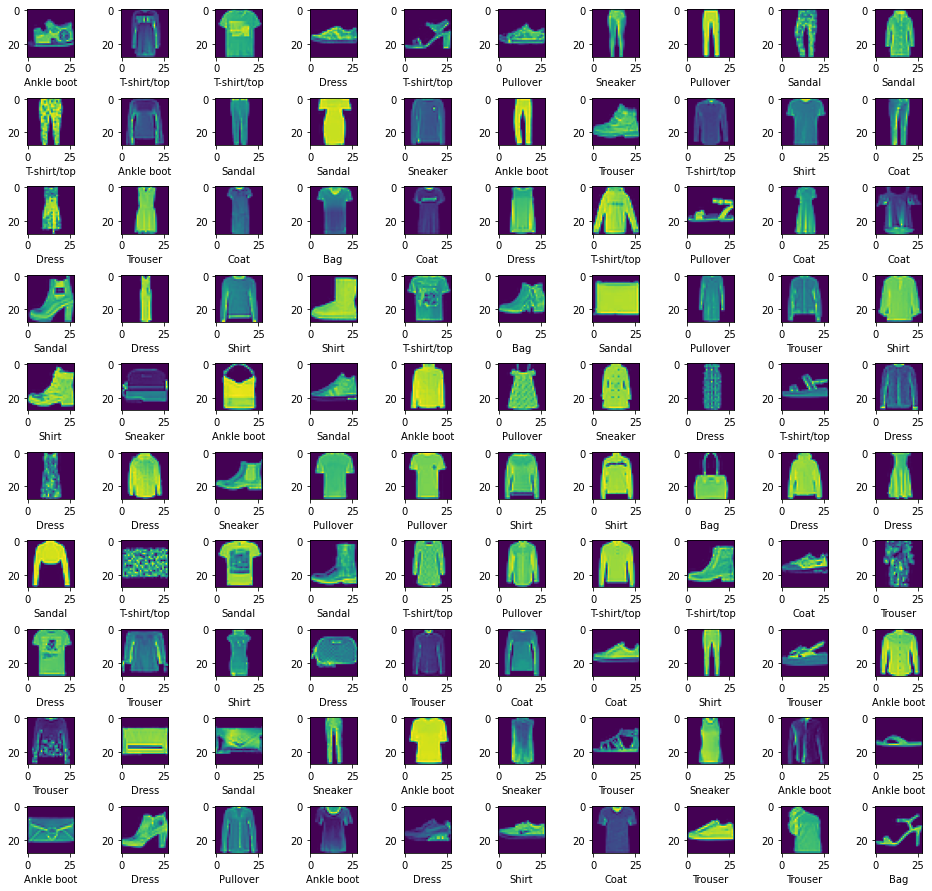

In [36]:
# show data
# rows,cols 
def show_image(nrows = 10, ncols = 10):
  fig = plt.figure(figsize=(13,13)) 
  ax = [plt.subplot(nrows,ncols,i+1) for i in range(nrows*ncols)]
  temp = np.random.choice(train_images.shape[0],nrows*ncols,replace=False)
  for i,a in enumerate(ax):
    a.imshow(train_images[temp[i]])
    # a.axis('off')
    # a.set_aspect('equal')
    a.set_xlabel(class_names[train_labels[i]])
  fig.tight_layout()
  fig.subplots_adjust(wspace=1.0, hspace=0.05)
  fig.show()
show_image()

In [22]:
# preprocess
train_images = train_images / 255.0

test_images = test_images / 255.0

In [24]:
# build model
# flatten image
# 128 nodes, 10 class !
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [25]:
# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# fit the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4983 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3395 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2696 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [27]:
# test acc
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3382 - accuracy: 0.8794

Test accuracy: 0.8794000148773193


In [33]:
# make prediction
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
np.argmax(predictions[3])

1

In [34]:
test_labels[3]

1

In [35]:
# garph to see the prediction
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [39]:
def show_predic(nrows = 5,ncols = 5):
  num_images = nrows*ncols
  plt.figure(figsize=(2*2*ncols, 2*nrows))
  for i in range(num_images):
    plt.subplot(nrows, 2*ncols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(nrows, 2*ncols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
  plt.tight_layout()
  plt.show()

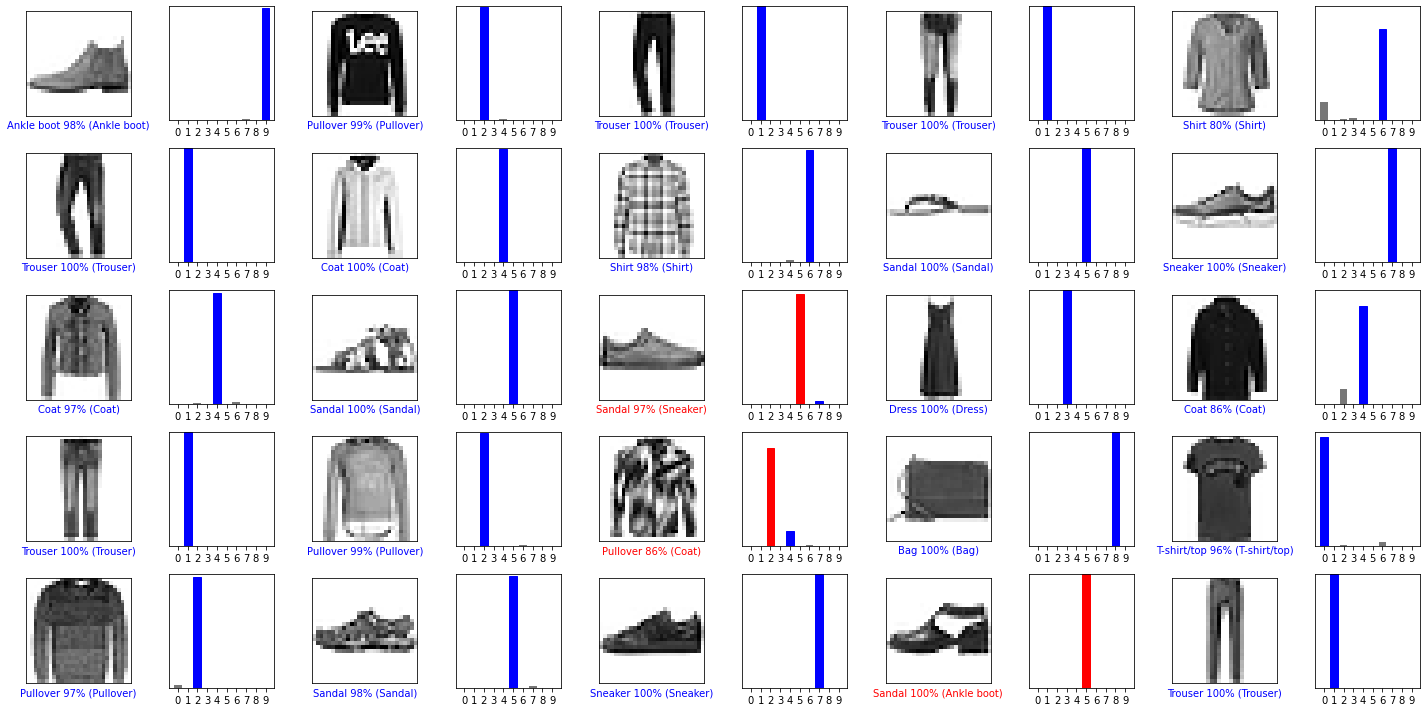

In [40]:
show_predic()